In [ ]:
import pandas as pd
import os
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats
import matplotlib
from matplotlib.dates import DateFormatter
import matplotlib.dates as md
import datetime as dt
from pivottablejs import pivot_ui
from IPython.display import HTML
import seaborn as sns
#import qgrid
#import ipywidgets as widgets

In [ ]:
def time_to_int(dateobj):
    total = int(dateobj.strftime('%S'))
    total += int(dateobj.strftime('%M')) * 60
    total += int(dateobj.strftime('%H')) * 60 * 60
    total += (int(dateobj.strftime('%j')) - 1) * 60 * 60 * 24
    total += (int(dateobj.strftime('%Y')) - 1970) * 60 * 60 * 24 * 365
    return total

def myfunc(x):
    return slope * x + intercept

In [ ]:
db_filename = 'todo.db'

db_is_new = not os.path.exists(db_filename)

conn = sqlite3.connect(db_filename)

if db_is_new:
    print('Need to create schema')
else:
    print('Database exists, assume schema does, too.')

conn.close()

In [ ]:
prices = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="SP1500_Sectors_Indexes_Prices")

In [ ]:
screener = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="Screener")

In [ ]:
fundamentals = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="Stock_Fundamentals")
fundamentals.set_index(fundamentals.columns[0],inplace=True)


In [ ]:
stock_indexes = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="SP1500")
stock_indexes.drop(stock_indexes.columns[0], axis=1, inplace=True)
stock_indexes.set_index(stock_indexes.columns[0],inplace=True)
stock_indexes

In [ ]:
spdr_indexes = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="spdr_indexes")
#vanguard_sectors.drop(vanguard_sectors.columns[0], axis=1, inplace=True)
spdr_indexes.set_index(spdr_indexes.columns[0],inplace=True)
spdr_indexes.columns=['Symbol']
spdr_indexes

In [ ]:
vanguard_sectors = pd.read_excel('SP1500_screener_multiple.xlsx',sheet_name="vanguard_sectors")
#vanguard_sectors.drop(vanguard_sectors.columns[0], axis=1, inplace=True)
vanguard_sectors.set_index(vanguard_sectors.columns[0],inplace=True)
vanguard_sectors.columns=['Symbol']
vanguard_sectors

In [ ]:
[*spdr_indexes['Symbol'],*vanguard_sectors['Symbol']]

['SP1500',
 'SP500',
 'SP600',
 'SP400',
 'Communication Services ETF',
 'Consumer Discretionary ETF',
 'Consumer Staples ETF',
 'Energy ETF',
 'Financials ETF',
 'Health Care ETF',
 'Industrials ETF',
 'Information Technology ETF',
 'Materials ETF',
 'Real Estate ETF',
 'Utilities ETF']

In [514]:
sector_performance_return = pd.DataFrame()

for v in [*spdr_indexes['Symbol'],*vanguard_sectors['Symbol']]:
    subset = prices[prices['Symbol'] == v]
    subset_ = subset.set_index('Date').asfreq('Q')[['Adj Close']].pct_change()
    subset_.index = subset_.index.values.astype('M8[D]')
    dt_str = subset_.index[-1].strftime('%Y-%m-%d')
    tail = subset[subset.set_index('Date').index>=dt_str]
    dt_str = subset.set_index('Date').index[-1].strftime('%Y-%m-%d')
    tail_ = pd.DataFrame([(tail.set_index('Date')['Adj Close'][-1]-tail.set_index('Date')['Adj Close'][0])/tail.set_index('Date')['Adj Close'][0]],index=[datetime.strptime(dt_str, '%Y-%m-%d')],columns=['Adj Close'])
    subset__ = pd.concat([subset_,tail_],axis=0)
    sector_performance_return = pd.concat([sector_performance_return,subset__],axis=1)

In [515]:
sector_performance_return

,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close,Adj Close
2020-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-30,0.086119,0.090383,0.032878,0.068091,-0.188315,0.097573,0.013268,0.051209,0.120087,0.118587,0.120651,0.192380,0.062281,0.028859,0.098022
2020-12-31,0.132216,0.121185,0.312278,0.211458,0.300830,0.182130,0.092916,0.073335,0.138205,0.178685,0.172363,0.172875,0.101111,0.253698,0.074374
2021-03-31,0.070761,0.063518,0.184526,0.084662,0.324479,0.083288,0.087920,0.031042,0.015110,0.116450,0.105419,0.073815,0.025327,0.165207,0.030385
2021-06-30,0.080495,0.083593,0.043034,0.033635,0.126094,0.108092,0.115985,-0.005272,0.114030,0.040613,0.049264,0.064435,0.083442,0.074954,0.029888
2021-09-30,0.000378,0.002523,-0.030694,-0.024123,-0.026222,-0.021207,-0.000098,0.002739,0.006319,-0.043573,-0.041816,-0.012866,0.000121,0.024323,-0.018026
2021-12-31,0.103038,0.106772,0.049293,0.077726,0.050203,-0.037011,0.139811,0.124048,0.141743,0.080207,0.136524,0.099010,0.077925,0.042310,0.115277
2022-03-31,-0.049102,-0.049099,-0.058344,-0.089783,0.379204,-0.114414,-0.065856,0.034591,-0.090992,-0.041831,-0.014374,-0.103975,-0.045192,-0.032929,-0.019862
2022-06-06,-0.084923,-0.088234,-0.047751,-0.074518,0.167227,-0.141025,-0.096060,0.005253,-0.134604,-0.070756,-0.012729,-0.155746,-0.064510,-0.080094,-0.029401


In [522]:
sector_performance_return.columns = [*[i for i in spdr_indexes.index],*[v for v in vanguard_sectors.index]]
sector_performance_return = sector_performance_return.T

In [523]:
cm = sns.color_palette("blend:red,yellow,green", as_cmap=True)

sector_performance_return.style.background_gradient(cmap = cm,axis=1)

,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,2022-06-06 00:00:00
SP1500,nan,0.086119,0.132216,0.070761,0.080495,0.000378,0.103038,-0.049102,-0.084923
SP500,nan,0.090383,0.121185,0.063518,0.083593,0.002523,0.106772,-0.049099,-0.088234
SP600,nan,0.032878,0.312278,0.184526,0.043034,-0.030694,0.049293,-0.058344,-0.047751
SP400,nan,0.068091,0.211458,0.084662,0.033635,-0.024123,0.077726,-0.089783,-0.074518
Communication Services ETF,nan,-0.188315,0.300830,0.324479,0.126094,-0.026222,0.050203,0.379204,0.167227
Consumer Discretionary ETF,nan,0.097573,0.182130,0.083288,0.108092,-0.021207,-0.037011,-0.114414,-0.141025
Consumer Staples ETF,nan,0.013268,0.092916,0.087920,0.115985,-0.000098,0.139811,-0.065856,-0.096060
Energy ETF,nan,0.051209,0.073335,0.031042,-0.005272,0.002739,0.124048,0.034591,0.005253
Financials ETF,nan,0.120087,0.138205,0.015110,0.114030,0.006319,0.141743,-0.090992,-0.134604
Health Care ETF,nan,0.118587,0.178685,0.116450,0.040613,-0.043573,0.080207,-0.041831,-0.070756


In [524]:
sector_performance_return

,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-06
SP1500,NaN,0.086119,0.132216,0.070761,0.080495,0.000378,0.103038,-0.049102,-0.084923
SP500,NaN,0.090383,0.121185,0.063518,0.083593,0.002523,0.106772,-0.049099,-0.088234
SP600,NaN,0.032878,0.312278,0.184526,0.043034,-0.030694,0.049293,-0.058344,-0.047751
SP400,NaN,0.068091,0.211458,0.084662,0.033635,-0.024123,0.077726,-0.089783,-0.074518
Communication Services ETF,NaN,-0.188315,0.300830,0.324479,0.126094,-0.026222,0.050203,0.379204,0.167227
Consumer Discretionary ETF,NaN,0.097573,0.182130,0.083288,0.108092,-0.021207,-0.037011,-0.114414,-0.141025
Consumer Staples ETF,NaN,0.013268,0.092916,0.087920,0.115985,-0.000098,0.139811,-0.065856,-0.096060
Energy ETF,NaN,0.051209,0.073335,0.031042,-0.005272,0.002739,0.124048,0.034591,0.005253
Financials ETF,NaN,0.120087,0.138205,0.015110,0.114030,0.006319,0.141743,-0.090992,-0.134604
Health Care ETF,NaN,0.118587,0.178685,0.116450,0.040613,-0.043573,0.080207,-0.041831,-0.070756


In [525]:
sector_performances = pd.DataFrame()
sector_performances_values = pd.DataFrame()
for c in sector_performance_return.columns:
    print(c)
    temp = pd.DataFrame(sector_performance_return[c].sort_values(ascending=False).index,columns=[c])
    temp2 = pd.DataFrame(sector_performance_return[c].sort_values(ascending=False),columns=[c])
    temp2.reset_index(drop=True,inplace=True)    
    sector_performances = pd.concat([sector_performances,temp],axis=1)
    sector_performances_values = pd.concat([sector_performances_values,temp2],axis=1)
    #print(sector_performance_return[c].sort_values(ascending=False))
sector_performances_values

2020-06-30 00:00:00
2020-09-30 00:00:00
2020-12-31 00:00:00
2021-03-31 00:00:00
2021-06-30 00:00:00
2021-09-30 00:00:00
2021-12-31 00:00:00
2022-03-31 00:00:00
2022-06-06 00:00:00


,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-06
0,NaN,0.192380,0.312278,0.324479,0.126094,0.024323,0.141743,0.379204,0.167227
1,NaN,0.120651,0.300830,0.184526,0.115985,0.006319,0.139811,0.034591,0.005253
2,NaN,0.120087,0.253698,0.165207,0.114030,0.002739,0.136524,-0.014374,-0.012729
3,NaN,0.118587,0.211458,0.116450,0.108092,0.002523,0.124048,-0.019862,-0.029401
4,NaN,0.098022,0.182130,0.105419,0.083593,0.000378,0.115277,-0.032929,-0.047751
5,NaN,0.097573,0.178685,0.087920,0.083442,0.000121,0.106772,-0.041831,-0.064510
6,NaN,0.090383,0.172875,0.084662,0.080495,-0.000098,0.103038,-0.045192,-0.070756
7,NaN,0.086119,0.172363,0.083288,0.074954,-0.012866,0.099010,-0.049099,-0.074518
8,NaN,0.068091,0.138205,0.073815,0.064435,-0.018026,0.080207,-0.049102,-0.080094
9,NaN,0.062281,0.132216,0.070761,0.049264,-0.021207,0.077925,-0.058344,-0.084923


In [526]:
sector_performances_values

,2020-06-30,2020-09-30,2020-12-31,2021-03-31,2021-06-30,2021-09-30,2021-12-31,2022-03-31,2022-06-06
0,NaN,0.192380,0.312278,0.324479,0.126094,0.024323,0.141743,0.379204,0.167227
1,NaN,0.120651,0.300830,0.184526,0.115985,0.006319,0.139811,0.034591,0.005253
2,NaN,0.120087,0.253698,0.165207,0.114030,0.002739,0.136524,-0.014374,-0.012729
3,NaN,0.118587,0.211458,0.116450,0.108092,0.002523,0.124048,-0.019862,-0.029401
4,NaN,0.098022,0.182130,0.105419,0.083593,0.000378,0.115277,-0.032929,-0.047751
5,NaN,0.097573,0.178685,0.087920,0.083442,0.000121,0.106772,-0.041831,-0.064510
6,NaN,0.090383,0.172875,0.084662,0.080495,-0.000098,0.103038,-0.045192,-0.070756
7,NaN,0.086119,0.172363,0.083288,0.074954,-0.012866,0.099010,-0.049099,-0.074518
8,NaN,0.068091,0.138205,0.073815,0.064435,-0.018026,0.080207,-0.049102,-0.080094
9,NaN,0.062281,0.132216,0.070761,0.049264,-0.021207,0.077925,-0.058344,-0.084923


In [527]:
sector_performances = pd.DataFrame()
for c in sector_performance_return.columns:
    print(c)
    temp = pd.DataFrame(sector_performance_return[c].sort_values(ascending=False).index,columns=[c])
    sector_performances = pd.concat([sector_performances,temp],axis=1)
    #print(sector_performance_return[c].sort_values(ascending=False))

2020-06-30 00:00:00
2020-09-30 00:00:00
2020-12-31 00:00:00
2021-03-31 00:00:00
2021-06-30 00:00:00
2021-09-30 00:00:00
2021-12-31 00:00:00
2022-03-31 00:00:00
2022-06-06 00:00:00


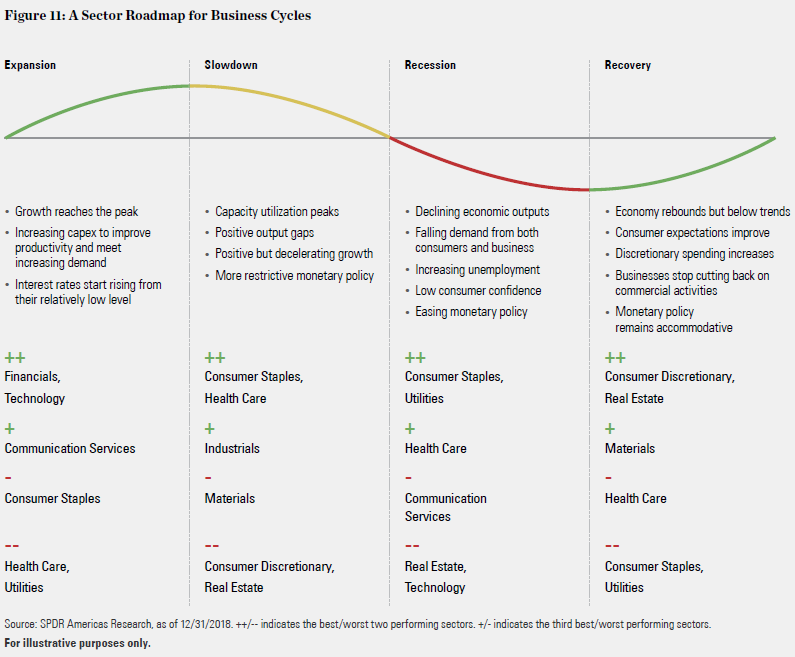

,2020-06-30 00:00:00,2020-09-30 00:00:00,2020-12-31 00:00:00,2021-03-31 00:00:00,2021-06-30 00:00:00,2021-09-30 00:00:00,2021-12-31 00:00:00,2022-03-31 00:00:00,2022-06-06 00:00:00
0,SP1500,Information Technology ETF,SP600,Communication Services ETF,Communication Services ETF,Real Estate ETF,Financials ETF,Communication Services ETF,Communication Services ETF
1,SP500,Industrials ETF,Communication Services ETF,SP600,Consumer Staples ETF,Financials ETF,Consumer Staples ETF,Energy ETF,Energy ETF
2,SP600,Financials ETF,Real Estate ETF,Real Estate ETF,Financials ETF,Energy ETF,Industrials ETF,Industrials ETF,Industrials ETF
3,SP400,Health Care ETF,SP400,Health Care ETF,Consumer Discretionary ETF,SP500,Energy ETF,Utilities ETF,Utilities ETF
4,Communication Services ETF,Utilities ETF,Consumer Discretionary ETF,Industrials ETF,SP500,SP1500,Utilities ETF,Real Estate ETF,SP600
5,Consumer Discretionary ETF,Consumer Discretionary ETF,Health Care ETF,Consumer Staples ETF,Materials ETF,Materials ETF,SP500,Health Care ETF,Materials ETF
6,Consumer Staples ETF,SP500,Information Technology ETF,SP400,SP1500,Consumer Staples ETF,SP1500,Materials ETF,Health Care ETF
7,Energy ETF,SP1500,Industrials ETF,Consumer Discretionary ETF,Real Estate ETF,Information Technology ETF,Information Technology ETF,SP500,SP400
8,Financials ETF,SP400,Financials ETF,Information Technology ETF,Information Technology ETF,Utilities ETF,Health Care ETF,SP1500,Real Estate ETF
9,Health Care ETF,Materials ETF,SP1500,SP1500,Industrials ETF,Consumer Discretionary ETF,Materials ETF,SP600,SP1500


In [528]:
import matplotlib as mp
cycles_ = ['Expansion','Slowdown','Recession','Recovery']
from IPython.display import display
from PIL import Image

path=r"C:\Users\User\Documents\wiki\wiki\dev\python\Python-Stock\reports\figures\Business cycles.png"
display(Image.open(path))

def b_g(s, cmap=cm, low=0, high=0):
    # Pass the columns from Dataframe A 
    a = A.loc[:,s.name].copy()
    #rng = a.max() - a.min()
    rng = np.nanmax(A.values.ravel()) - np.nanmin(A.values.ravel())
    norm = mp.colors.Normalize(np.nanmin(A.values.ravel()) - (rng * low),
                        np.nanmax(A.values.ravel()) + (rng * high))
    normed = norm(a.values)
    #c = [mp.colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    c = [mp.colors.rgb2hex(x) for x in plt.cm.get_cmap(cm)(normed)]
    return ['background-color: %s' % color for color in c]

A = sector_performances_values
B = sector_performances
df = B.style.apply(b_g,cmap='RdYlGn')
#sector_performances.style.background_gradient(cmap = cm,axis=1,)
df


In [ ]:
sector_performance = []
for v in vanguard_sectors['Symbol']:
    sector_performance.append([v,screener[screener['Symbol']==v]['risk_trend_factor'].values[0]])
    #print([v,)
    

In [ ]:
temp_v = vanguard_sectors.reset_index()
temp_v.columns = ['Sector','Symbol']

In [ ]:
pd.DataFrame(sector_performance,columns=['Symbol','risk_trend_factor']).merge(temp_v, on='Symbol', how='left').sort_values(by='risk_trend_factor',ascending=False)


In [ ]:
sector_dataset = pd.DataFrame()

for v in vanguard_sectors['Symbol']:
    subset = prices[prices['Symbol']==v].set_index('Date')[['Adj Close']].asfreq('Q').pct_change()
    
    plt.plot(subset)
    subset['Symbol'] = v
    sector_dataset = pd.concat([sector_dataset,subset],axis=0)
    #plt.xticks(np.array(subset.index)[np.arange(0,len(subset.index),int(len(subset.index)))], rotation=45)
    plt.xticks(subset.index, rotation=45)
plt.legend(vanguard_sectors['Symbol'].index,loc=2)    
plt.show()

d_ = []
for d in sector_dataset.reset_index()['Date']:
    d_.append(d.strftime('%Y-%m-%d'))


In [ ]:

sector_dataset['Date'] = d_

sector_dataset = sector_dataset.reset_index(drop=True).set_index('Date')
sector_dataset_pivot = sector_dataset.reset_index().pivot_table(values=['Adj Close'], index=['Symbol'],columns=['Date'])

sector_dataset_pivot.columns = sector_dataset_pivot.columns.droplevel(0)
sector_dataset_pivot

In [ ]:
#qgrid.show_grid(sector_dataset_pivot)

In [ ]:
for v in spdr_indexes['Symbol']:
    subset = prices[prices['Symbol']==v].set_index('Date')
    plt.plot(subset[['Adj Close']].asfreq('Q').pct_change())
    plt.xticks(np.array(subset.index)[np.arange(0,len(subset.index),int(len(subset.index)/10))], rotation=45)
plt.legend(spdr_indexes['Symbol'].index)    
plt.show()

In [ ]:
screener['Symbol']

In [ ]:
threshold = .9875

In [ ]:
screener_good = screener[screener['risk_trend_factor']!='missing']

risk_trend_threshold = screener_good['risk_trend_factor'].quantile(q=[threshold]).values[0]


In [ ]:
risk_trend_threshold

In [ ]:
temp = stock_sectors.reset_index()
temp.columns = ['Symbol','Sector']

In [ ]:
risk_screened = screener_good[screener_good['risk_trend_factor']>risk_trend_threshold]
risk_screened
#left join sector
risk_screened.merge(temp, on='Symbol', how='left')

In [ ]:
screener.columns

In [ ]:
"""
above_1yearSDev = screener_good[screener_good['latest_p']>screener['mean_1y']+screener_good['std_1y']]['Symbol'].values
above_2yearSDev = screener_good[screener_good['latest_p']>screener['mean_2y']+screener_good['std_2y']]['Symbol'].values
above_yearSDev = np.intersect1d(above_1yearSDev,above_2yearSDev)
"""

In [ ]:
#above_yearSDev

In [ ]:
"""
above_2year_t = screener[screener['pct_2yr']>threshold]['Symbol'].values
above_1year_t = screener[screener['pct_1yr']>threshold]['Symbol'].values
above_years_t = np.intersect1d(above_2year_t,above_1year_t)
"""

In [ ]:
#above_years_t

In [ ]:
#above_combined = np.intersect1d(above_yearSDev,above_years_t)

In [ ]:
#above_combined

In [ ]:
#screened_final_set = np.intersect1d(risk_screened,above_combined)

In [ ]:
screened_final_set = risk_screened.set_index('Symbol')
#screened_final_set

In [ ]:
#pivot_ui(prices, outfile_path='pivottablejs.html')
#HTML('pivottablejs.html')

In [ ]:
for s in np.setdiff1d(np.setdiff1d(screened_final_set.index,temp_v['Symbol'].values),spdr_indexes.iloc[:,0].values):
    print(s)
    subset=prices[prices['Symbol']==s]
    
    dates = []
    for t in subset['Date'].values:
        d = pd.Timestamp(t).strftime('%Y-%m-%d')
        dates.append(d)
        dto = datetime.strptime(d, '%Y-%m-%d').date()

    old_ordinal = [datetime.strptime(i, '%Y-%m-%d').toordinal() for i in dates]
    new_ordinal = old_ordinal + md.date2num(np.datetime64('0000-12-31'))
    x = new_ordinal
    y= subset['Adj Close']

    slope, intercept, r, p, std_err = stats.linregress(x, y)

    mymodel = list(map(myfunc, x))

    fig, ax = plt.subplots()
    
    plt.scatter(x, y)
    plt.scatter(x, subset['trailing_1yr_max'])
    plt.scatter(x, subset['trailing_1yr_min'])
    
    #plt.scatter(x, subset['supply_trend'])
    plt.scatter(x, subset['supply_trend_1yr'])
    print("supply trend:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['vol_30d_2yr'])
    print("Sector:", stock_sectors.iloc[np.where(np.array(stock_sectors.index)==s)[0][0]][0])
    print("Index:", stock_indexes.iloc[np.where(np.array(stock_indexes.index)==s)[0][0]][0])
    
    #print("Sector:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['Sector'])
    #print("Sector:",screener.loc[np.where(screener.set_index('Symbol').index==s)[0][0]]['vol_30d_2yr'])

    plt.plot(x, mymodel)
    
    l = matplotlib.dates.AutoDateLocator()
    f = matplotlib.dates.ConciseDateFormatter(l)    
    
    ax.set_xticklabels(ax.get_xticks(), rotation = 45)
    
    locator = matplotlib.dates.AutoDateLocator()
    formatter = matplotlib.dates.ConciseDateFormatter(locator)

    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    
    date_form = DateFormatter("%Y-%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.show()